In [1]:
'''
Visualizaciones que se me ocurren que pueden estar guay:

1.Tabla de empleados con sus datos y:
    Moda de todo
    Total de horas
    Media de horas
    Num total de ausencias
    
(Tabla de group by, hacer a mano????) HECHO!
    
Posibilidad de ordenar por Total de horas, media de horas, y num total de ausencias (streamlit)

2. Gráfico de barras de total de horas + gráfico de linea de media + información de total de bajas. (A mejorar)

3. Día de la semana y mes con más bajas. (tanto total de horas cómo total de bajas) (Cambiar ejes)

4. Num Razón de baja por mes (Y por estación, hecho)

5. Horas de media de baja por razón (hecho)

Intentar hacer 3 grupos con sentido, ¿Mirar distribución de horas de baja? (hecho)
Mirar la correlación entonces

Hijos y altura parece estar correlacionado un poquito más que el resto. Investigar

6. Añadir sí o sí tabla de referencia de las razones de baja, mirar si se pueden añadir al eje con diminutivos

7. Hacer predicción
quitar: weight, service time, id

8. ¿Sacar datos de medias y tal filtradas por cada uno de los grupos de horas? Si se tiene tiempo
    
'''



'\nVisualizaciones que se me ocurren que pueden estar guay:\n\n1.Tabla de empleados con sus datos y:\n    Moda de todo\n    Total de horas\n    Media de horas\n    Num total de ausencias\n    \n(Tabla de group by, hacer a mano????) HECHO!\n    \nPosibilidad de ordenar por Total de horas, media de horas, y num total de ausencias (streamlit)\n\n2. Gráfico de barras de total de horas + gráfico de linea de media + información de total de bajas. (A mejorar)\n\n3. Día de la semana y mes con más bajas. (tanto total de horas cómo total de bajas) (Cambiar ejes)\n\n4. Num Razón de baja por mes (Y por estación, hecho)\n\n5. Horas de media de baja por razón (hecho)\n\nIntentar hacer 3 grupos con sentido, ¿Mirar distribución de horas de baja? (hecho)\nMirar la correlación entonces\n\nHijos y altura parece estar correlacionado un poquito más que el resto. Investigar\n\n6. Añadir sí o sí tabla de referencia de las razones de baja, mirar si se pueden añadir al eje con diminutivos\n\n7. Hacer predicció

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("..\dataset\Absenteeism_at_work.csv", delimiter = ";")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
#Create new column to group hours
'''
Groups:
x <= 2hours -> 1 (Short leave)
2 hours < x <= 8 hours -> 2 (1 day or less)
8 hours < x -> 3 (Long leave, several days)
'''

'\nGroups:\nx <= 2hours -> 1 (Short leave)\n2 hours < x <= 8 hours -> 2 (1 day or less)\n8 hours < x -> 3 (Long leave, several days)\n'

In [5]:
group_hours = []
for i,r in df.iterrows():
    if r["Absenteeism time in hours"] <= 2: group_hours.append(1)
    elif r["Absenteeism time in hours"] <= 8: group_hours.append(2)
    else: group_hours.append(3)

df["Group Hours"] = group_hours
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Group Hours
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,2
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,1
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,2
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,1


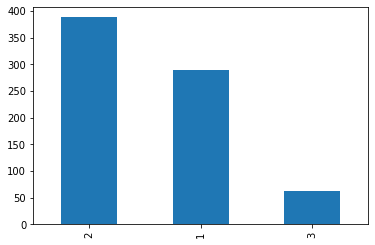

In [6]:
df["Group Hours"].value_counts().plot(kind = "bar")
plt.show()

In [7]:
df = df.rename(columns={"ID": "Employee ID"})

In [8]:
df.describe()

,Employee ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Group Hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324,1.694595
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998,0.618806
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,1.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,1.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000,2.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,2.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000,3.000000


<AxesSubplot:>

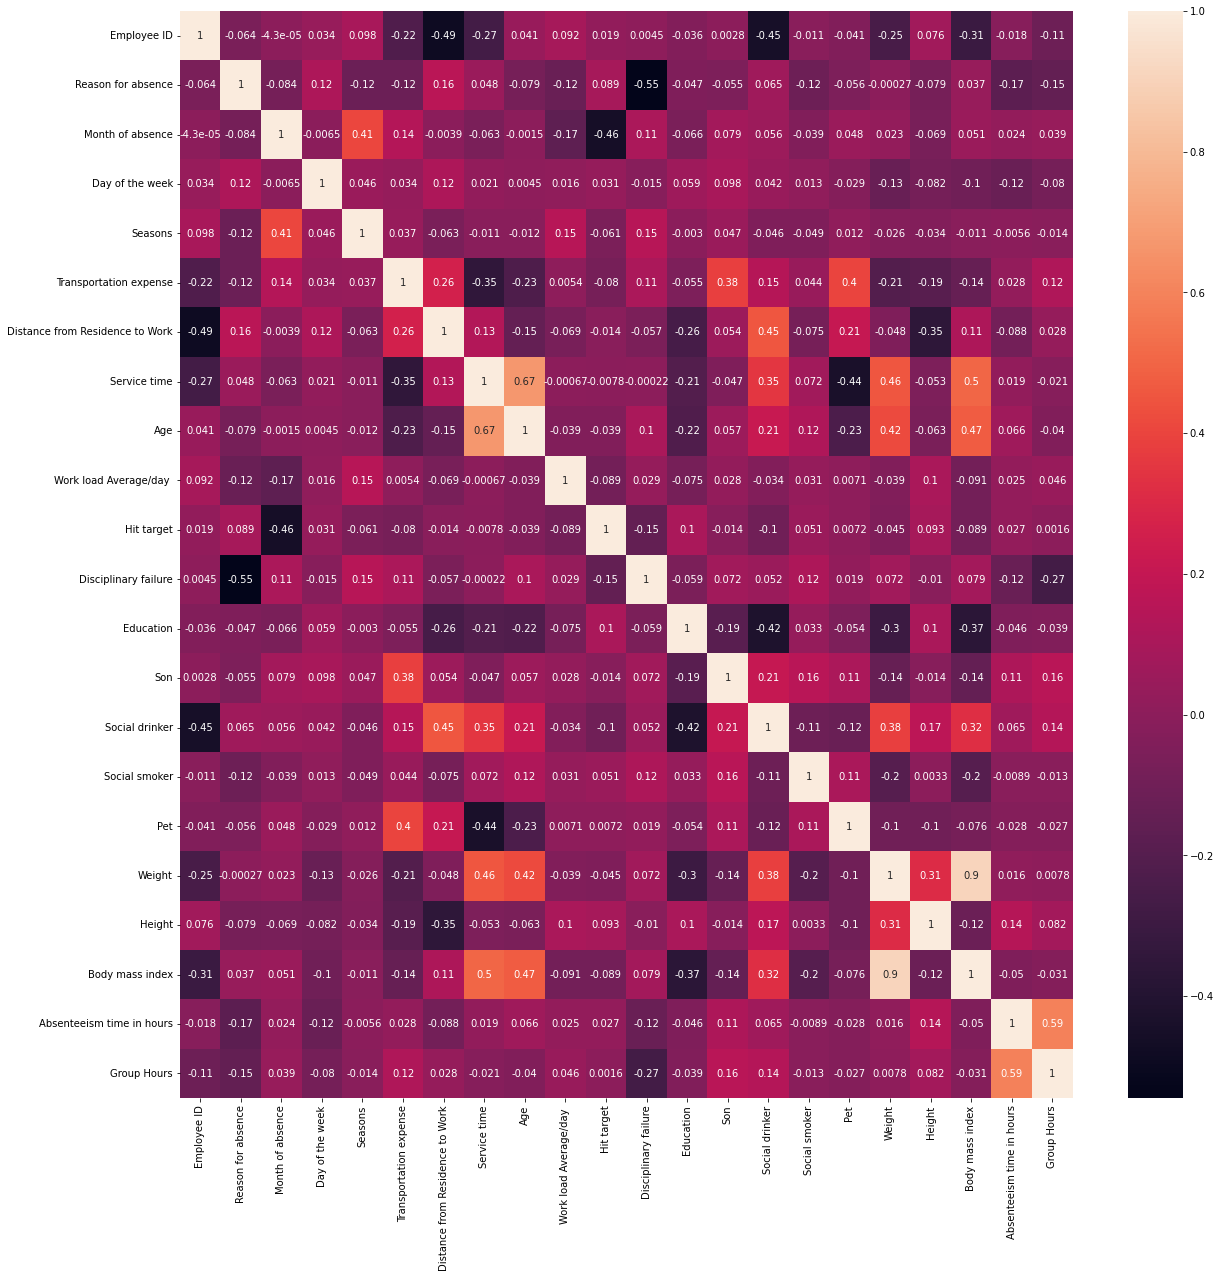

In [9]:
fig = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

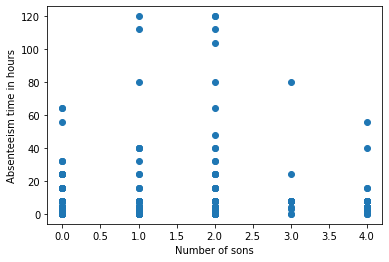

In [10]:
plt.scatter(df["Son"], df["Absenteeism time in hours"])
plt.xlabel("Number of sons")
plt.ylabel("Absenteeism time in hours")
plt.show()

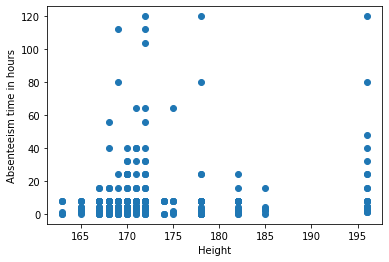

In [11]:
plt.scatter(df["Height"], df["Absenteeism time in hours"])
plt.xlabel("Height")
plt.ylabel("Absenteeism time in hours")
plt.show()

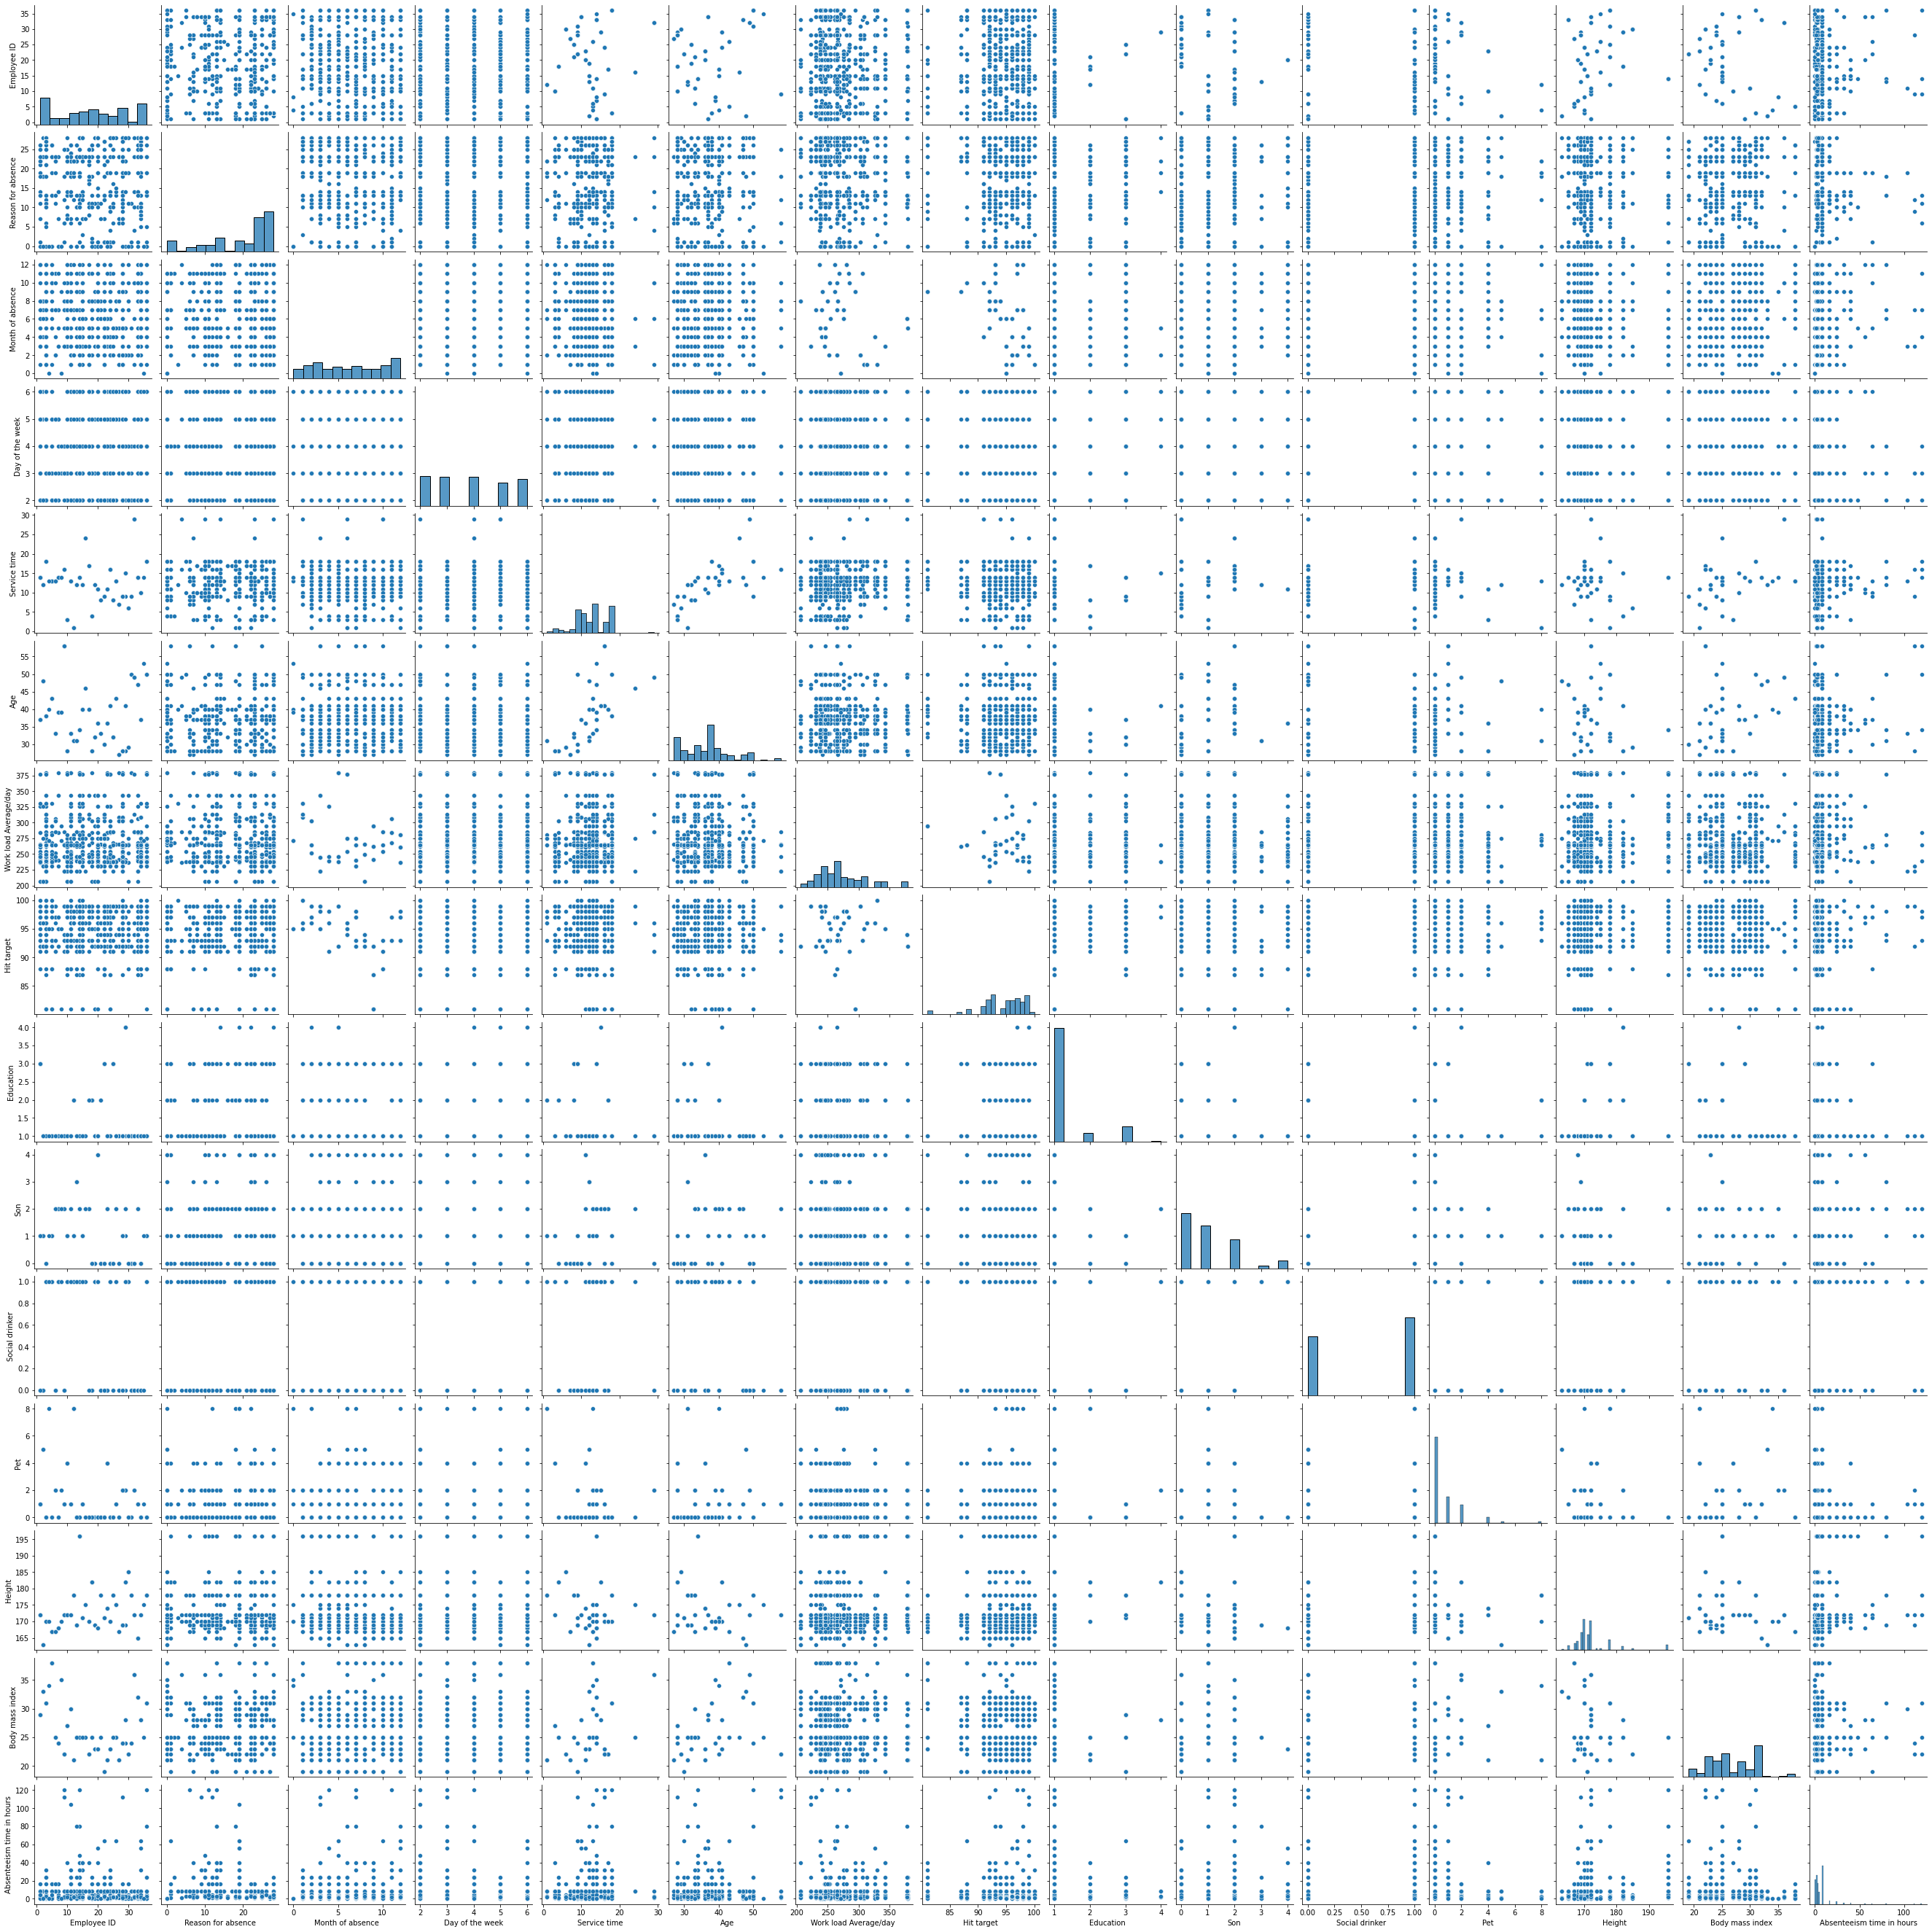

In [33]:

columns_to_drop = [
    "Seasons","Transportation expense","Group Hours",
    "Distance from Residence to Work","Disciplinary failure","Social smoker",
    "Weight"
]
df_aux = df.drop(columns_to_drop,axis = 1)
sns.pairplot(df_aux)


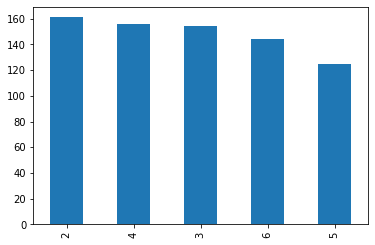

In [13]:
df["Day of the week"].value_counts().plot(kind = "bar")
plt.show()

<AxesSubplot:>

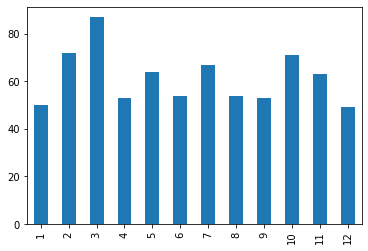

In [14]:
series_month_total = df["Month of absence"].value_counts()
series_month_total = series_month_total.sort_index()
series_month_total = series_month_total.drop(labels=[0])
series_month_total.plot(kind = "bar")

<AxesSubplot:xlabel='Month of absence'>

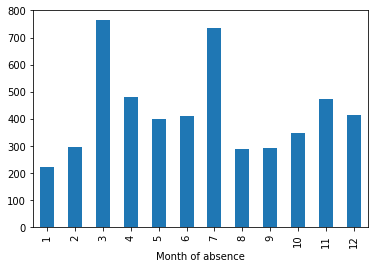

In [15]:
series_month_sum = df.groupby(["Month of absence"])["Absenteeism time in hours"].sum()
series_month_sum = series_month_sum.drop(labels = [0])
series_month_sum.plot(kind="bar")

In [16]:
df.groupby(df["Month of absence"])["Reason for absence"].agg(pd.Series.mode)

Month of absence
0      0
1     27
2     27
3     27
4     28
5     28
6     28
7     23
8     23
9     23
10    23
11    23
12    23
Name: Reason for absence, dtype: int64

In [17]:
'''
Reasons:

27 = physiotherapy
28 = dental consultation
23 = medical consultation
'''

'\nReasons:\n\n27 = physiotherapy\n28 = dental consultation\n23 = medical consultation\n'

In [18]:
df.groupby(df["Seasons"])["Reason for absence"].agg(pd.Series.mode)

Seasons
1    23
2    27
3    28
4    23
Name: Reason for absence, dtype: int64

Hours total by Reason for absence


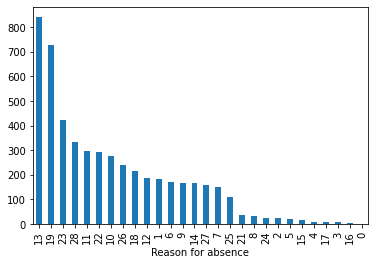

In [19]:
series_reason_sum = df.groupby(df["Reason for absence"])["Absenteeism time in hours"].sum()
series_reason_sum = series_reason_sum.sort_values(ascending = False)
series_reason_sum.plot(kind = "bar")
print("Hours total by Reason for absence")
plt.show()

In [20]:
'''
13 = Diseases of the musculoskeletal system and connective tissue
19 = Injury, poisoning and certain other consequences of external causes
23 = medical consultation
28 = dental consultation
11 = Diseases of the digestive system
22 = patient follow-up 
10 = Diseases of the respiratory system
26 = unjustified absence
18 = Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
12 = Diseases of the skin and subcutaneous tissue  
1 = Certain infectious and parasitic diseases  
6 = Diseases of the nervous system  
9 = Diseases of the circulatory system
'''

'\n13 = Diseases of the musculoskeletal system and connective tissue\n19 = Injury, poisoning and certain other consequences of external causes\n23 = medical consultation\n28 = dental consultation\n11 = Diseases of the digestive system\n22 = patient follow-up \n10 = Diseases of the respiratory system\n26 = unjustified absence\n18 = Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  \n12 = Diseases of the skin and subcutaneous tissue  \n1 = Certain infectious and parasitic diseases  \n6 = Diseases of the nervous system  \n9 = Diseases of the circulatory system\n'

Hours mean by Reason for absence


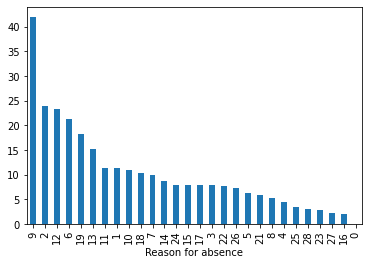

In [21]:
series_reason_sum = df.groupby(df["Reason for absence"])["Absenteeism time in hours"].mean()
series_reason_sum = series_reason_sum.sort_values(ascending = False)
series_reason_sum.plot(kind = "bar")
print("Hours mean by Reason for absence")
plt.show()

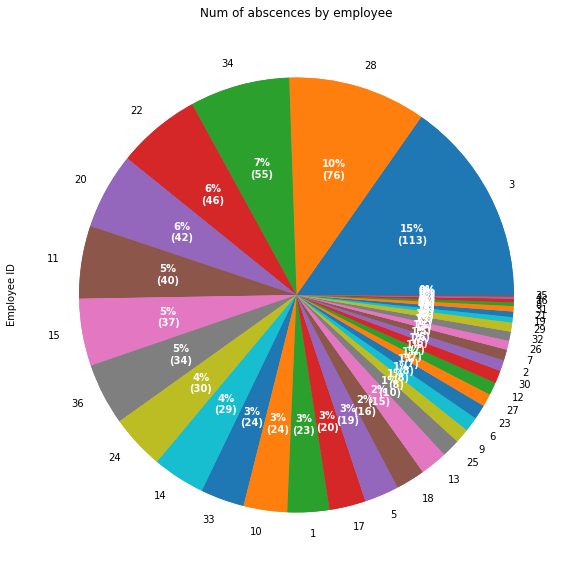

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
df["Employee ID"].value_counts().plot(kind="pie",ax = ax)


def percentage(pct, total):
    absolut = round((pct/100)*total)
    return f"{round(pct)}%\n({absolut})" 


wedges, texts, autotexts = ax.pie(df["Employee ID"].value_counts(), autopct=lambda pct: percentage(pct, len(df.index)),
                                  textprops=dict(color="w"))




plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Num of abscences by employee")

plt.show()



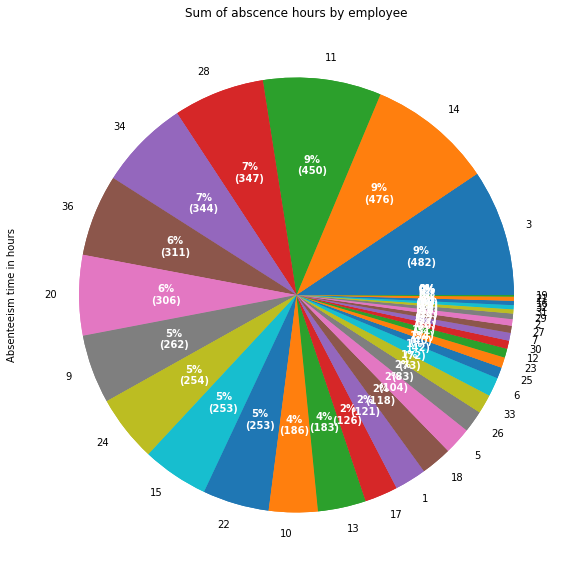

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
series_sum_hbi = df.groupby(["Employee ID"])["Absenteeism time in hours"].sum().sort_values(ascending = False)

series_sum_hbi.plot(kind="pie",ax = ax)


wedges, texts, autotexts = ax.pie(series_sum_hbi, autopct=lambda pct: percentage(pct, 
                                df["Absenteeism time in hours"].sum()),textprops=dict(color="w"))




plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Sum of abscence hours by employee")

plt.show()

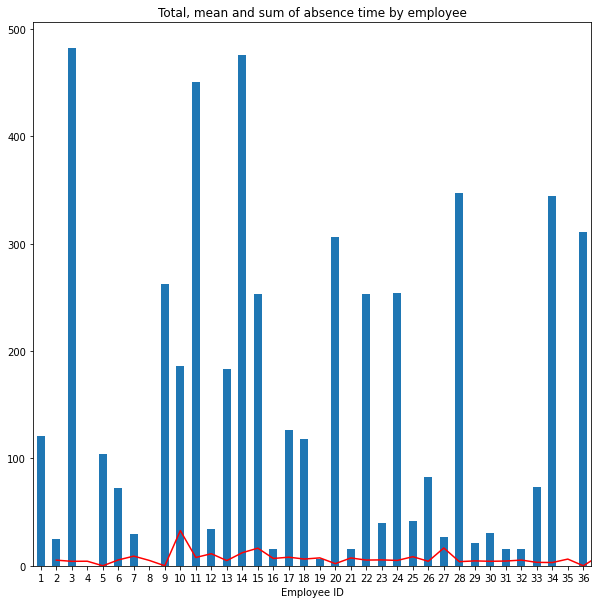

In [24]:
series_sum_hbi = df.groupby(["Employee ID"])["Absenteeism time in hours"].sum()
series_mean_hbi = df.groupby(["Employee ID"])["Absenteeism time in hours"].mean()

fig, ax = plt.subplots(figsize=(10, 10))

series_sum_hbi.plot(kind="bar",ax = ax)
series_mean_hbi.plot(kind="line", ax=ax, color = "red")



plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Total, mean and sum of absence time by employee")

plt.show()

In [25]:
series_mean_hbi.plot(kind="line", ax=ax, color = "red")
plt.show()

In [26]:
df.head()

,Employee ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Group Hours
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,2
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,1
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,2
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,1


In [27]:
df_id = df.groupby(df["Employee ID"])["Reason for absence"].agg(lambda x: pd.Series.mode(x)[0]).to_frame()

In [28]:
def create_groupby_column(df,column_name):
    return df.groupby(df["Employee ID"])[column_name].agg(lambda x: pd.Series.mode(x)[0]).values

In [29]:
droped_columns = ["Employee ID","Reason for absence","Absenteeism time in hours","Group Hours"]
for column in df.drop(droped_columns,axis = 1).columns:
    df_id[column] = create_groupby_column(df,column)

In [30]:
df_id["Absenteeism hours mean"] = df.groupby(df["Employee ID"])["Reason for absence"].mean()
df_id["Absenteeism hours total"] = df.groupby(df["Employee ID"])["Reason for absence"].sum()

In [31]:
df_id

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism hours mean,Absenteeism hours total
Employee ID,,,,,,,,,,,,,,,,,,,,,
1,22,8,2,1,235,11,14,37,236.629,93,...,3,1,0,0,1,88,172,29,17.913043,412
2,0,8,2,1,235,29,12,48,205.917,92,...,1,1,0,1,5,88,163,33,14.500000,87
3,27,2,4,2,179,51,18,38,222.196,97,...,1,0,1,0,0,89,170,31,22.964602,2595
4,0,0,3,1,118,14,13,40,271.219,95,...,1,1,1,0,8,98,170,34,0.000000,0
5,26,9,2,4,235,20,13,43,265.017,88,...,1,1,1,0,0,106,167,38,17.105263,325
6,22,2,5,2,189,29,13,33,302.585,91,...,1,2,0,0,2,69,167,25,19.375000,155
7,0,3,5,1,279,5,14,39,343.253,92,...,1,2,1,1,0,68,168,24,9.666667,58
8,0,0,3,1,231,35,14,39,271.219,81,...,1,2,1,0,2,100,170,35,0.000000,0
9,6,3,3,1,228,14,16,58,222.196,99,...,1,2,0,0,1,65,172,22,13.875000,111
